<a href="https://colab.research.google.com/github/mn000000/Simulacion-1/blob/main/Integracion_MonteCarlo_25_junio_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estimación de la integral por métodos Monte Carlo

En esta notebook, estimamos la integral de la función $\sqrt{\arctan(x)}$ en el intervalo $[0, 1]$ utilizando dos métodos de Monte Carlo:
1. Método de la media muestral
2. Método de acierto y error

Incluimos también intervalos de confianza para los resultados obtenidos.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir la función a integrar
def integrand(x):
    return np.sqrt(np.arctan(x))


### Método de la media muestral

En este método, generamos números aleatorios uniformemente distribuidos en el intervalo [0, 1]. Luego evaluamos la función integrand en estos puntos y tomamos la media de estas evaluaciones para obtener una estimación de la integral.


In [2]:
def monte_carlo_mean(n):
    # Generamos n muestras aleatorias uniformemente distribuidas en [0, 1]
    samples = np.random.uniform(0, 1, n)
    # Evaluamos la función en las muestras generadas
    evaluations = integrand(samples)
    # Calculamos la media de las evaluaciones
    mean_estimate = np.mean(evaluations)
    return mean_estimate

# Parámetros de la simulación
n = 100000  # número de muestras
confidence_level = 0.95  # nivel de confianza para el intervalo de confianza

# Realizamos la simulación utilizando el método de la media muestral
mean_estimate = monte_carlo_mean(n)
# Calculamos la desviación estándar de la muestra
sample_std = np.std(integrand(np.random.uniform(0, 1, n)))
# Calculamos el puntaje z para el nivel de confianza deseado
z_score = norm.ppf((1 + confidence_level) / 2)
# Calculamos el intervalo de confianza para la estimación de la media
ci_mean = (mean_estimate - z_score * sample_std / np.sqrt(n), mean_estimate + z_score * sample_std / np.sqrt(n))

print(f"Estimación por método de la media muestral: {mean_estimate} con intervalo de confianza {ci_mean}")


Estimación por método de la media muestral: 0.6301808711290385 con intervalo de confianza (0.6289101945107087, 0.6314515477473683)


### Método de acierto y error

En este método, generamos dos conjuntos de números aleatorios: uno para las coordenadas x en el intervalo [0, 1] y otro para las coordenadas y en el intervalo [0, $\sqrt{\arctan(1)}$]. Contamos cuántos puntos (x, y) caen por debajo de la curva de la función integrand y usamos esta proporción para estimar la integral.


In [3]:
def monte_carlo_hit_or_miss(n):
    # Generamos n muestras aleatorias para las coordenadas x e y
    x_samples = np.random.uniform(0, 1, n)
    y_samples = np.random.uniform(0, np.sqrt(np.arctan(1)), n)
    # Contamos los aciertos (puntos debajo de la curva de la función integrand)
    hits = y_samples < integrand(x_samples)
    hit_ratio = np.mean(hits)
    # Estimamos la integral utilizando la proporción de aciertos
    return hit_ratio * np.sqrt(np.arctan(1))

# Realizamos la simulación utilizando el método de acierto y error
hit_or_miss_estimate = monte_carlo_hit_or_miss(n)
# Calculamos la desviación estándar del método de acierto y error
hit_std = np.sqrt(hit_or_miss_estimate * (1 - hit_or_miss_estimate) / n)
# Calculamos el intervalo de confianza para la estimación de acierto y error
ci_hit = (hit_or_miss_estimate - z_score * hit_std, hit_or_miss_estimate + z_score * hit_std)

print(f"Estimación por método de acierto y error: {hit_or_miss_estimate} con intervalo de confianza {ci_hit}")


Estimación por método de acierto y error: 0.627891776683279 con intervalo de confianza (0.6248958917937528, 0.6308876615728052)


### Gráficas

Visualizamos la función integrand y la distribución de las evaluaciones de la función en las muestras generadas.


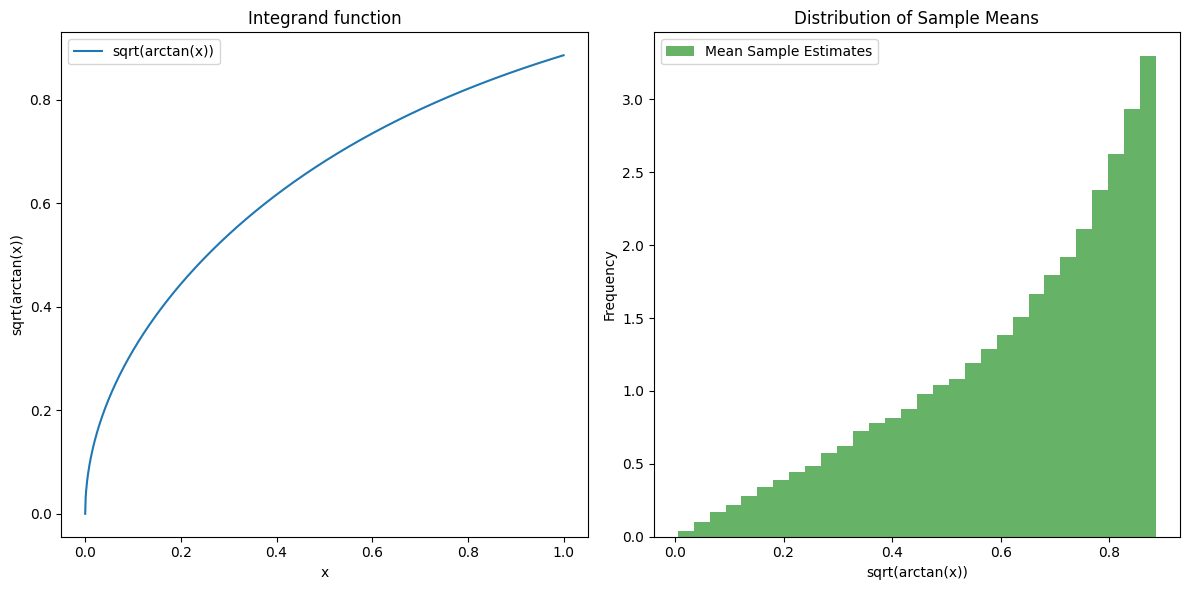

In [4]:
x = np.linspace(0, 1, 1000)
y = integrand(x)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, label='sqrt(arctan(x))')
plt.title('Integrand function')
plt.xlabel('x')
plt.ylabel('sqrt(arctan(x))')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(integrand(np.random.uniform(0, 1, n)), bins=30, density=True, alpha=0.6, color='g', label='Mean Sample Estimates')
plt.title('Distribution of Sample Means')
plt.xlabel('sqrt(arctan(x))')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
